# Building ePSF Model for GSC02581

In [1]:
#loading the image of GSC02581

import astropy
from astropy.io import fits
from astropy.io.fits import HDUList

import pathlib
import path

fits_image_GSC02581 = astropy.io.fits.open(pathlib.Path('Documents', 'research','unpacked_hst_data','GSC02581','ie6y54010_drz.fits'))

hdul = fits_image_GSC02581

image_data = fits.getdata('Documents/research/unpacked_hst_data/GSC02581/ie6y54010_drz.fits', ext=0)

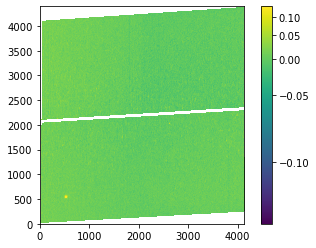

In [2]:
#visualize the image

import matplotlib
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

norm = simple_norm(image_data, 'asinh', percent=99.)
plt.imshow(image_data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

In [3]:
#find stars

from photutils.detection import find_peaks

peaks_tbl = find_peaks(image_data, threshold=400.)  
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output  
print(peaks_tbl)

x_peak y_peak peak_value
------ ------ ----------
   524    549  404.71954
   254   4132  802.89087
   254   4133  802.89087


In [4]:
#choosing stars

size = 25
hsize = (size - 1) / 2
x = peaks_tbl['x_peak']  
y = peaks_tbl['y_peak']  
mask = ((x > hsize) & (x < (image_data.shape[1] -1 - hsize)) &
        (y > hsize) & (y < (image_data.shape[0] -1 - hsize)))


#table of good star positions

from astropy.table import Table

stars_tbl = Table()
stars_tbl['x'] = x[mask]  
stars_tbl['y'] = y[mask]
print(stars_tbl)

 x   y  
--- ----
524  549
254 4132
254 4133


In [5]:
#subtract background

from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(image_data, sigma=2.)  
image_data -= median_val 

from astropy.nddata import NDData
nd_image_data = NDData(data=image_data) 

In [6]:
#extract stars

from photutils.psf import extract_stars
stars = extract_stars(nd_image_data, stars_tbl, size=25) 

data_interp = np.array(data, copy=True) is of type: <class 'numpy.ndarray'>
y, x = np.indices(data_interp.shape) is of type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
xy is of type: <class 'numpy.ndarray'>
z is of type: <class 'numpy.ndarray'>
if method == "cubic", then interpol is of type: <class 'scipy.interpolate.interpnd.CloughTocher2DInterpolator'>
xy_missing is of type: <class 'numpy.ndarray'>
data_interp[mask] is of type: <class 'numpy.ndarray'>
data_interp = np.array(data, copy=True) is of type: <class 'numpy.ndarray'>
y, x = np.indices(data_interp.shape) is of type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
xy is of type: <class 'numpy.ndarray'>
z is of type: <class 'numpy.ndarray'>
if method == "nearest", then interpol is of type: <class 'scipy.interpolate.ndgriddata.NearestNDInterpolator'>
xy_missing is of type: <class 'numpy.ndarray'>
data_interp[mask] is of type: <class 'numpy.ndarray'>
data_interp = np.array(data, copy=True) is of type: <class 'numpy.ndarray'>

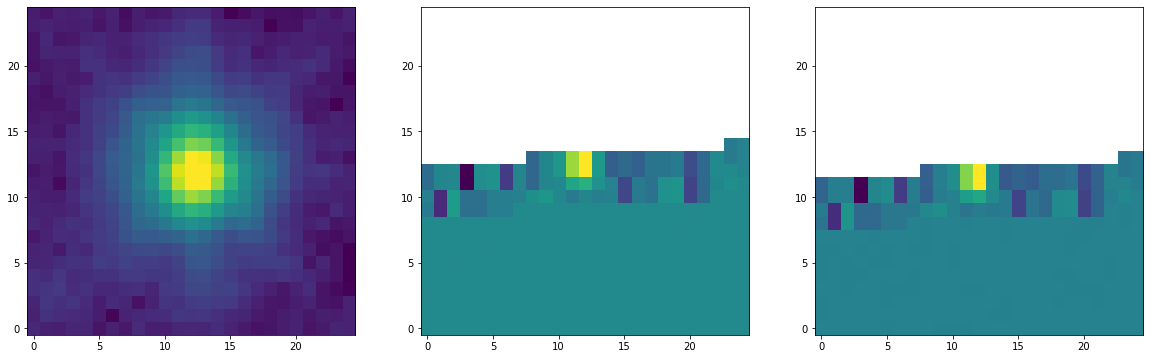

In [7]:
#plot the extracted stars

import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

nrows = 1
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20),
                        squeeze=True)
#cmaps = ['viridis', 'viridis', 'viridis']
ax = ax.ravel()
for i in range(nrows*ncols):
     norm = simple_norm(stars[i], 'log', percent=99.)
     ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis')
#     fig.colorbar(ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis'), ax=ax[i])

In [8]:
stars[0].shape

(25, 25)

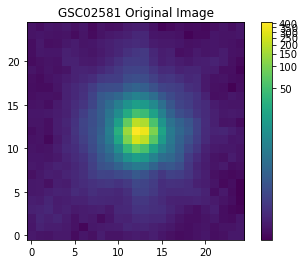

In [9]:
#plotting GSC02581 alone
norm = simple_norm(stars[0], 'log', 99.)
plt.imshow(stars[0], norm=norm, origin='lower', cmap='viridis')
plt.title('GSC02581 Original Image')
plt.colorbar()

In [10]:
#verifying stars[0]
#there should be no NaNs and no Infs

print(stars[0].data)

[[2.86277831e-01 2.30021402e-01 2.12784544e-01 2.76077002e-01
  2.78307885e-01 1.43786192e-01 2.38686591e-01 1.76344275e-01
  3.28964382e-01 2.16636345e-01 2.15153918e-01 2.82926410e-01
  3.07091117e-01 2.80078083e-01 3.47923100e-01 2.47574851e-01
  1.88696012e-01 1.36923864e-01 1.56263143e-01 1.99570879e-01
  2.45782077e-01 1.46857977e-01 1.86171532e-01 2.69997686e-01
  2.59515792e-01]
 [2.38187179e-01 4.16303277e-01 3.40262234e-01 3.26938182e-01
  2.97937214e-01 2.02068299e-01 8.49219337e-02 2.55619735e-01
  3.03014576e-01 3.10723037e-01 3.35420966e-01 4.75883007e-01
  4.28516716e-01 4.54462349e-01 3.77179086e-01 3.09624225e-01
  2.68554360e-01 1.84775382e-01 1.58276141e-01 1.93250224e-01
  2.34211355e-01 1.67431623e-01 2.19989151e-01 2.07555696e-01
  2.53629714e-01]
 [2.63915926e-01 4.62938666e-01 3.79510164e-01 4.47104990e-01
  3.18446338e-01 2.04069406e-01 3.15299749e-01 2.81381667e-01
  1.39141247e-01 2.41845116e-01 4.35851812e-01 4.11760241e-01
  5.43003023e-01 5.87158859e-01 5.

In [11]:
#verifying number of masked values in stars[0]
#import numpy as np
#from numpy.ma import nomask

#print('Current masked values:', np.ma.count(stars[0].data))

#stars_0 = np.ma.array(stars[0], mask=nomask, keep_mask=False)

#print('New masked values:', np.ma.count(stars_0.data))

In [12]:
#finding centroids

from photutils.centroids import centroid_com
from photutils.centroids import centroid_quadratic
from photutils.centroids import centroid_1dg
from photutils.centroids import centroid_2dg

com_centroid = centroid_com(stars[0].data, mask=None, oversampling=1)
print('From centroid_com:', com_centroid)

quadratic_centroid = centroid_quadratic(stars[0].data, mask = None)
print('From centroid_quadratic:', quadratic_centroid)

onedg_centroid = centroid_1dg(stars[0].data, mask=None)
print('From centroid_1dg:', onedg_centroid)

twodg_centroid = centroid_2dg(stars[0].data, mask=None)
print('From centroid_2dg:', twodg_centroid)


From centroid_com: [12.30765739 11.93263338]
From centroid_quadratic: [12.21950992 11.93944505]
From centroid_1dg: [12.33766339 11.89372166]
From centroid_2dg: [12.35470153 11.89591738]


In [13]:
# turning ndarray centroid output into tuple of two 1D ndarray variables

#import numpy as np

#print('The com_centroid x coordinate is:', com_centroid[0])
#print('The com_centroid y coordinate is:', com_centroid[1])

#x = com_centroid[0]
#y = com_centroid[1]

#x_array = np.array(x)
#y_array = np.array(y)

#print('The type of x_array is:', type(x_array))
#print('The type of y_array is:', type(y_array))

#com_centroid_tuple = (x_array, y_array)
#print('The tuple of two 1D ndarray variables version com_centroid is:', com_centroid_tuple)
#print('The type of com_centroid_tuple is:', type(com_centroid_tuple))

# making a function for it

#def tuplize(self):
    
    #x = self[0]
    #y = self[1]
    
    #x_array = np.array(x)
    #y_array = np.array(y)
    
    #self_tuple = (x_array, y_array)
    
    #return self_tuple

# testing function

#print('The function is:')
#if tuplize(com_centroid) == com_centroid_tuple:
    #print('Successful!')
#else: print('Incorrect... try again.')

In [14]:
# new centroid functions for EPSFBuilder

#def new_centroid_com(self):
    
    #x = centroid_com(self.data, mask=None, oversampling=1)
    #centroid_com_2 = tuplize(x)
    
    #return centroid_com_2
    
#testing function

#print('The function is:')

#if new_centroid_com(stars[0]) == tuplize(centroid_com(stars[0].data, mask=None, oversampling=1)):
    #print('Successful!')
#else: print('Incorrect... try again.')

In [15]:
#building the ePSF

from photutils.psf import EPSFBuilder
import numpy as np

recentering_func1 = com_centroid
recentering_func2 = quadratic_centroid
recentering_func3 = onedg_centroid
recentering_func4 = twodg_centroid

epsf_builder = EPSFBuilder(oversampling=3, maxiters=50, shape = (75,75), smoothing_kernel = 'quartic', 
                           recentering_func=recentering_func1, recentering_maxiters = 50, 
                           progress_bar=False, recentering_boxsize = 25)

epsf, fitted_stars = epsf_builder(stars[0])


#plotting the ePSF model

import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, origin='lower', norm=norm, cmap='viridis')
plt.title('GSC02581 ePSF Model')
plt.colorbar()

epsf.data.shape

The original oversampling (int or float) type is converted to: <class 'numpy.ndarray'>
The type of an original oversampling length ==1 is converted to: <class 'numpy.ndarray'>
self._norm_radius = norm_radius is of type: <class 'float'>
self._shift_val = shift_val is of type: <class 'float'>
self.oversampling = oversampling is of type: <class 'numpy.ndarray'>
param = np.atleast_1d(param) is of type: <class 'numpy.ndarray'>
self.shape = self._init_img_params is of type: <class 'numpy.ndarray'>
self.shape = self.shape.astype(int) is of type: <class 'numpy.ndarray'>
self.recentering_func = recentering_func is of type: <class 'numpy.ndarray'>
self.recentering_maxiters = recentering_maxiters is of type: <class 'int'>
param = np.atleast_1d(param) is of type: <class 'numpy.ndarray'>
The type of param = np.repeat(param,2) of length ==1 is: <class 'numpy.ndarray'>
self.recentering_boxsize = self._init_img_params(recentering_boxsize) is of type: <class 'numpy.ndarray'>
self.recentering_boxsize = 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#Find the centre pixel of the star and its pixel value

import numpy as np
peak_value_star = np.amax(stars[0])
print(peak_value_star)

ind_star = np.unravel_index(np.argmax(stars[0], axis=None), stars[0].shape)
print(ind_star)


#Find the centre pixel of the ePSF and its pixel value
import numpy as np
peak_value_epsf = np.amax(epsf.data)
print(peak_value_epsf)

ind_epsf = np.unravel_index(np.argmax(epsf.data, axis=None), epsf.data.shape)
print(ind_epsf)


#divide the value of that star centre pixel by the value of the centre pixel of the ePSF

scaling_ratio = peak_value_star/peak_value_epsf


#multiply the ePSF by that value

scaled_epsf = scaling_ratio * epsf.data

ind_scaled_epsf = np.unravel_index(np.argmax(scaled_epsf, axis=None), scaled_epsf.shape)
print(ind_scaled_epsf)

import numpy as np
peak_value_scaled_epsf = np.amax(scaled_epsf)
print(peak_value_scaled_epsf)

In [ ]:
#imaging the scaled ePSF

import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

norm = simple_norm(scaled_epsf, 'log', percent=99.)
print(scaled_epsf[37,37])
plt.imshow(scaled_epsf, origin='lower', norm=norm, cmap='viridis')
plt.title('GSC02581 Scaled ePSF Model')
plt.colorbar()

In [ ]:
scaled_epsf.shape

In [ ]:
#slicing the array (because I don't know how to go from 2D (51,51) to 4D (25,25))
#sliced_scaled_epsf = scaled_epsf[1:51,1:51]
#print(sliced_scaled_epsf.shape)

#reshapping the scaled_epsf array
#"If a has the shape m, n, the reshape should have the form
#a.reshape(m_bins, m // m_bins, n_bins, n // n_bins)"

reshaped_scaled_epsf = (scaled_epsf.reshape(25,3,25,3).sum(3).sum(1))/9.
print(reshaped_scaled_epsf.shape)


In [ ]:
#imaging the resized scaled ePSF

import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

norm = simple_norm(reshaped_scaled_epsf, 'log', percent=99.)
plt.imshow(reshaped_scaled_epsf, origin='lower', norm=norm, cmap='viridis')
plt.title('GSC02581 Resized Scaled ePSF Model')
plt.colorbar()

In [ ]:
#verify maxima of ePSF and of star
import numpy as np

peak_value_star = np.amax(stars[0])
print('The maximum pixel value of GSC02581 is:', peak_value_star)

ind_star = np.unravel_index(np.argmax(stars[0], axis=None), stars[0].shape)
print('The pixel coordinates of the brightest pixel in the star image is:', ind_star)

peak_value_reshaped_scaled_epsf = np.amax(reshaped_scaled_epsf)
print('The maximum pixel value of the ePSF is:', peak_value_reshaped_scaled_epsf)

ind_reshaped_scaled_epsf = np.unravel_index(np.argmax(reshaped_scaled_epsf, axis=None), reshaped_scaled_epsf.shape)
print('The pixel coordinates of the brightest pixel in the ePSF is:', ind_reshaped_scaled_epsf)

#divide value of the star centre pixel by value of the ePSF centre pixel
scaling_ratio_2 = peak_value_star / peak_value_reshaped_scaled_epsf

#multiply the ePSF by the new scaling ratio
new_reshaped_scaled_epsf = scaling_ratio_2 * reshaped_scaled_epsf

new_peak_value_reshaped_scaled_epsf = np.amax(new_reshaped_scaled_epsf)
print('The maximum pixel value of the new ePSF is:', new_peak_value_reshaped_scaled_epsf)

new_ind_reshaped_scaled_epsf = np.unravel_index(np.argmax(new_reshaped_scaled_epsf, axis=None), new_reshaped_scaled_epsf.shape)
print('The pixel coordinates of the brightest pixel in the new ePSF is:', new_ind_reshaped_scaled_epsf)


In [ ]:
#imaging the new resized scaled ePSF

import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

norm = simple_norm(new_reshaped_scaled_epsf, 'log', percent=99.)
plt.imshow(new_reshaped_scaled_epsf, origin='lower', norm=norm, cmap='viridis')
plt.title('GSC02581 New Resized Scaled ePSF Model')
plt.colorbar()

In [ ]:
#residual_image = stars[0] - scaled_epsf
residual_image = np.subtract(stars[0], new_reshaped_scaled_epsf)

norm = simple_norm(residual_image, 'log', percent=99.)
plt.imshow(residual_image, norm=norm, origin='lower', cmap='viridis')
plt.title('GSC02581 Residual Image')
plt.colorbar()

print(np.amax(residual_image))
print(np.amin(residual_image))

In [ ]:
#verify subtraction


print('Residual Image Max:', residual_image.max())
print('Residual Image Min:', residual_image.min())

print('Residual Image Array:', residual_image)

In [ ]:
%store new_reshaped_scaled_epsf

In [ ]:
print(new_reshaped_scaled_epsf)